# Introduction

Data analytics jobs are becoming trendy nowadays. A general understanding of the job market can help job seekers navigate the job search and career preparation. The purpose of exploring data analysis is to answer some questions with data for data analyst dream chasers:

* How are salaries?
* Where are the jobs?
* Who are the top hirers?
* What skills/education/years of experience are needed?

This study is based on the dataset of data-analyst-jobs, created by picklesueat. The dataset contains 2253 job listings for data analyst positions in the US from Glassdoor. Based on the data features analysis, such as Salary Estimate, Location, Company Rating, Job Description etc., some recommendations are generated at the end of the study.

Keywords: EDA, Visualization, NLP

# Content:

Preparation:

* Package importation
* Data importation
* Data Observation & Cleaning

Analysis:

* Salary
* Location
* Top Hirers
* Skills

Summary

# Preparation

Package Importation:

In [1]:
# Import nessecary packages

# Packages for dataframe operations
import numpy as np 
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import collections

# Packages for text analysis
from wordcloud import WordCloud
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#!pip install gensim --user
from gensim.summarization import keywords
from gensim.summarization import summarize
import spacy
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [2]:
# To set the plot styles of the study using Seaborn white style.
sns.set_style('white')

Data Importation

In [3]:
job = pd.read_csv("/kaggle/input/data-analyst-jobs/DataAnalyst.csv")

Data Observation:

In [4]:
job.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
job.shape

(2253, 16)

In [6]:
job.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [7]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

Data Cleaning

In [8]:
#Delete a column not needed 
job.reset_index(drop=True)
del job['Unnamed: 0']

In [9]:
job.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [10]:
job.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [11]:
# fill the NA with -1
job.fillna(-1,inplace=True)

In [12]:
job.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [13]:
# To check the unique catagories of 'Size'
job["Size"].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown', '-1'], dtype=object)

In [14]:
# To check the unique catagories of 'Revenue'
job["Revenue"].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       'Unknown / Non-Applicable', '$50 to $100 million (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)', '-1',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

In [15]:
# To check the unique catagories of 'Salary Estimate'
job["Salary Estimate"].unique()

array(['$37K-$66K (Glassdoor est.)', '$46K-$87K (Glassdoor est.)',
       '$51K-$88K (Glassdoor est.)', '$51K-$87K (Glassdoor est.)',
       '$59K-$85K (Glassdoor est.)', '$43K-$76K (Glassdoor est.)',
       '$60K-$110K (Glassdoor est.)', '$41K-$78K (Glassdoor est.)',
       '$45K-$88K (Glassdoor est.)', '$73K-$127K (Glassdoor est.)',
       '$84K-$90K (Glassdoor est.)', '$27K-$52K (Glassdoor est.)',
       '$42K-$74K (Glassdoor est.)', '$77K-$132K (Glassdoor est.)',
       '$98K-$114K (Glassdoor est.)', '$48K-$96K (Glassdoor est.)',
       '$26K-$47K (Glassdoor est.)', '$31K-$59K (Glassdoor est.)',
       '$47K-$81K (Glassdoor est.)', '$43K-$69K (Glassdoor est.)',
       '$49K-$112K (Glassdoor est.)', '$30K-$54K (Glassdoor est.)',
       '$55K-$103K (Glassdoor est.)', '$37K-$70K (Glassdoor est.)',
       '$57K-$103K (Glassdoor est.)', '$35K-$45K (Glassdoor est.)',
       '$42K-$66K (Glassdoor est.)', '$65K-$81K (Glassdoor est.)',
       '$113K-$132K (Glassdoor est.)', '$42K-$63K (Glas

We can see that, the column consist salary ranges strings. To make the data comparable and easy to analyze, the code below add 4 columns: 'Salary_From', 'Salary_To', 'Salary_Mean', 'Salary_Range'

In [16]:
# Add 4 columns based on "Salary Estimate"
job['Salary_From'] = job["Salary Estimate"].str.extractall(r"[$](\d+)").xs(0, level='match')
job['Salary_To'] = job["Salary Estimate"].str.extractall(r"[$](\d+)").xs(1, level='match')
job.fillna(-1,inplace=True)
job['Salary_From'] = job['Salary_From'].astype(int)
job["Salary_To"] = job["Salary_To"].astype(int)
job['Salary_Mean'] = (job["Salary_To"] + job['Salary_From'])/2
job['Salary_Range'] = job["Salary_To"] - job['Salary_From']

# Can also be achieved by:
#job['Salary_From'] = job["Salary Estimate"].str.extract(r"[$](\d+)")
#job['Salary_To'] = job["Salary Estimate"].str.extract(r"(\d+)\S ")


In [17]:
# Strip '\n' from "Company Name"
job["Company Name"] = job["Company Name"].str.replace("(\n).*","")

In [18]:
# Add two columns based on 'Location', to seperate city and state
job["Location_State"] = job["Location"].agg(lambda x: x[-2:])
job["Location_City"] = job["Location"].agg(lambda x: x[:-4])

In [19]:
job.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,Easy Apply,Salary_From,Salary_To,Salary_Mean,Salary_Range,Location_State,Location_City
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,Non-Profit,$100 to $500 million (USD),-1,True,37,66,51.5,29,NY,New York
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,Health Care,$2 to $5 billion (USD),-1,-1,37,66,51.5,29,NY,New York
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37,66,51.5,29,NY,New York


In [20]:
job[job["Company Name"].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,Easy Apply,Salary_From,Salary_To,Salary_Mean,Salary_Range,Location_State,Location_City
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,...,-1,-1,-1,-1,53,99,76.0,46,NC,Mooresville


In [21]:
job.fillna(-1,inplace=True)

In [22]:
# To check the unique catagories of "Type of ownership"
job["Type of ownership"].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', '-1', 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

In [23]:
# To check the unique catagories of "Industry"
job["Industry"].unique()

array(['Social Assistance', 'Health Care Services & Hospitals',
       'Internet', 'IT Services', 'Sports & Recreation',
       'Investment Banking & Asset Management', 'Insurance Carriers',
       'Venture Capital & Private Equity', 'Research & Development', '-1',
       'Advertising & Marketing', 'Brokerage Services',
       'Building & Personnel Services', 'Consulting',
       'Casual Restaurants', 'Enterprise Software & Network Solutions',
       'Lending', 'Banks & Credit Unions', 'Computer Hardware & Software',
       'Staffing & Outsourcing',
       'Motion Picture Production & Distribution', 'Legal', 'Real Estate',
       'Federal Agencies', 'TV Broadcast & Cable Networks', 'Accounting',
       'Food & Beverage Stores', 'Health, Beauty, & Fitness',
       'Biotech & Pharmaceuticals', 'Insurance Agencies & Brokerages',
       'Gambling', 'Video Games', 'Colleges & Universities',
       'Architectural & Engineering Services',
       'General Repair & Maintenance', 'Security Servi

# Analysis 

* Salary

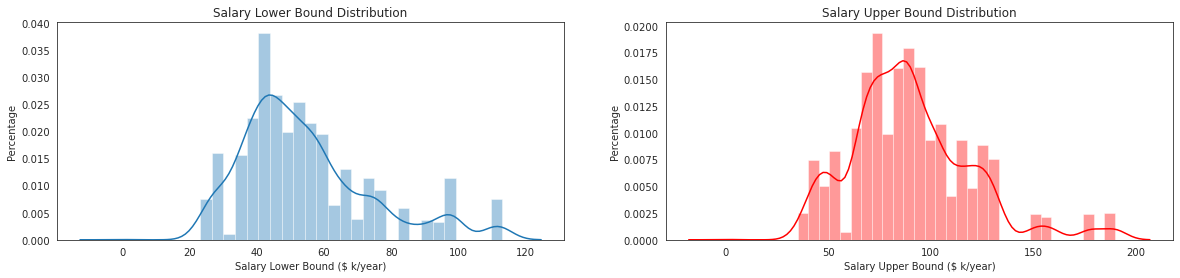

In [24]:
# Visualize the salary lower and upper bound
fig,(ax0, ax1) = plt.subplots(nrows =1, ncols = 2, figsize = (20,4))
sns.distplot(job['Salary_From'], ax = ax0)
sns.distplot(job['Salary_To'], color = 'r', ax = ax1)
ax0.set(xlabel = "Salary Lower Bound ($ k/year)", ylabel = 'Percentage')
ax0.set(title = "Salary Lower Bound Distribution")
ax1.set(xlabel = "Salary Upper Bound ($ k/year)", ylabel = 'Percentage')
ax1.set(title = "Salary Upper Bound Distribution")
plt.show()

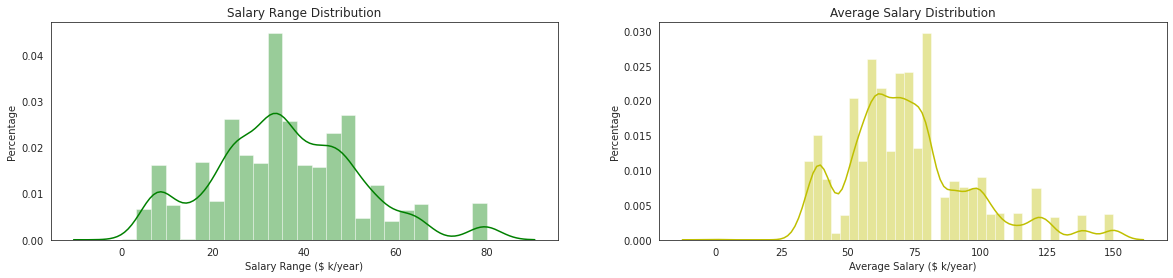

In [25]:
# Visualize the salary range and the salary mean
fig,(ax0, ax1) = plt.subplots(nrows =1, ncols = 2, figsize = (20,4))
sns.distplot(job['Salary_Range'], color = 'g', ax = ax0)
sns.distplot(job['Salary_Mean'], color = 'y', ax = ax1)
ax0.set(xlabel = "Salary Range ($ k/year)", ylabel = 'Percentage')
ax0.set(title = "Salary Range Distribution")
ax1.set(xlabel = "Average Salary ($ k/year)", ylabel = 'Percentage')
ax1.set(title = "Average Salary Distribution")
plt.show()

In [26]:
Salary_df = job[['Salary_From','Salary_To', 'Salary_Range', 'Salary_Mean']].drop(2149)
Salary_df.describe()

,Salary_From,Salary_To,Salary_Range,Salary_Mean
count,2252.000000,2252.000000,2252.000000,2252.000000
mean,54.266874,89.979130,35.712256,72.123002
std,19.575375,29.315605,16.038126,23.600734
min,24.000000,38.000000,6.000000,33.500000
25%,41.000000,70.000000,25.000000,58.000000
50%,50.000000,87.000000,34.000000,69.000000
75%,64.000000,104.000000,46.000000,80.500000
max,113.000000,190.000000,80.000000,150.000000


The above shows:
Salary Lower bound: the majority are within 40-60k, the average is 54k,
Salary Upperbound: the majority are within 70-100k; the standard is 90k.
We also notice that the upper bound variation (std about 30) is more expansive than lower bounds (std about 20).

Salary Range: the majority are within 25-45k, the average is 35k.
Salary Mean: the majority are within 55-80k; the average is 72k.

Then we are going to look at the mean salary distribution in different states.

In [27]:
# Make a order list
sort_list = sorted(job.groupby('Location_State')['Salary_Mean'].median().items(), key= lambda x:x[1], reverse = True)
state_list_sort = [x[0] for x in sort_list]

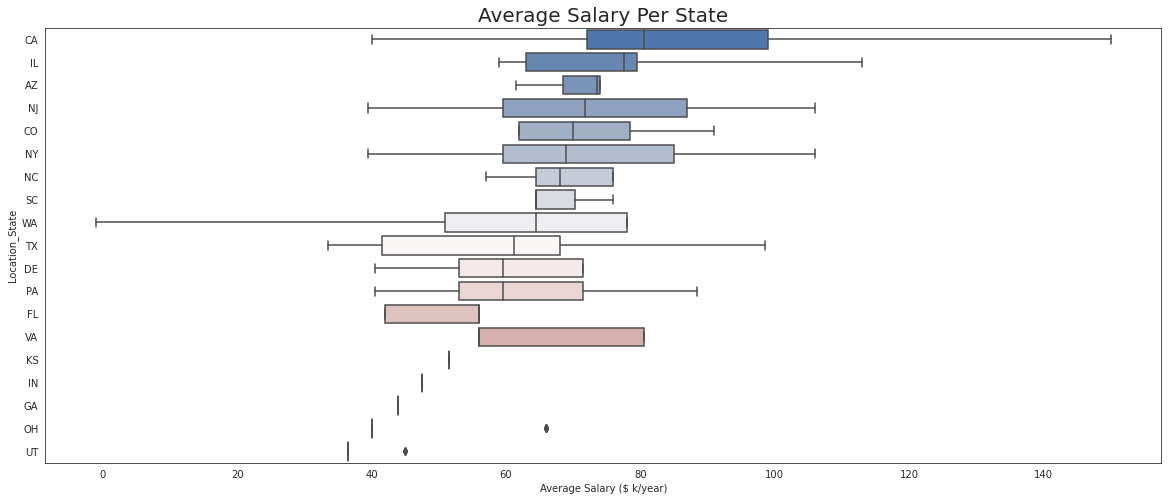

In [28]:
plt.figure(figsize = (20,8))
sns.boxplot(x='Salary_Mean',y = 'Location_State', data=job, whis = 10, order = state_list_sort, palette="vlag" )
plt.xlabel("Average Salary ($ k/year)")
plt.title("Average Salary Per State", size =20)
plt.show()

We can see that the states of Califonia, Illinois are leading the salaries.

Then we are going to check the mean salary distribution in different cities.

In [29]:
# Make a order list
city_20_list = job.groupby('Location')['Location'].count().sort_values(ascending = False).head(20)
city_count_list = [x for x in city_20_list.index]
sort_list_city = sorted(job[job['Location'].isin(city_count_list)].groupby('Location')['Salary_Mean'].median().items(), key= lambda x:x[1], reverse = True)
city_list = [x[0] for x in sort_list_city ]

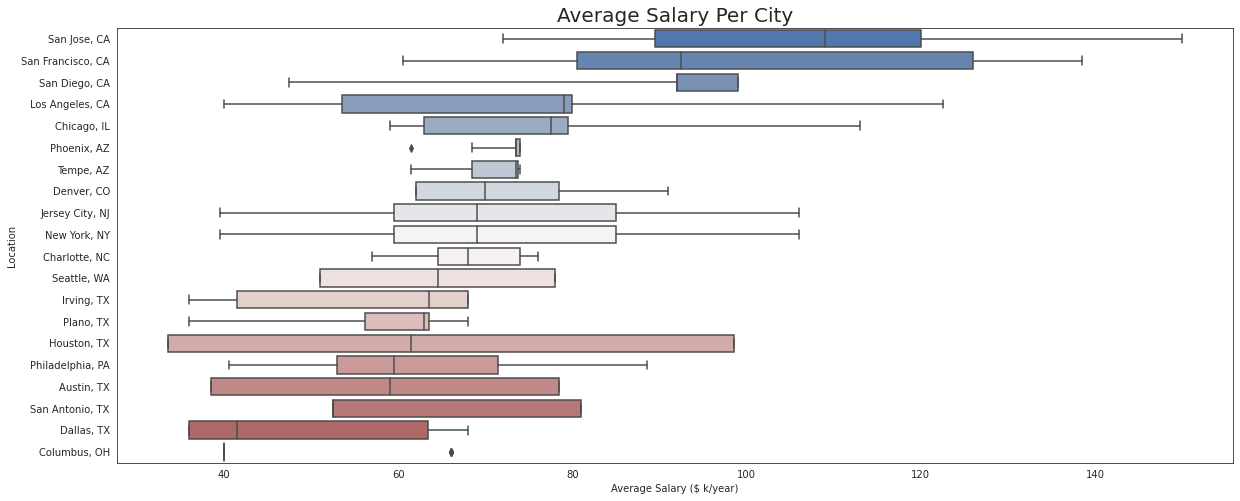

In [30]:
plt.figure(figsize = (20,8))
sns.boxplot(x='Salary_Mean',y = 'Location', data=job, whis = 10, order = city_list, palette="vlag" )
plt.xlabel("Average Salary ($ k/year)")
plt.title("Average Salary Per City", size = 20)
plt.show()

The above shows that jobs in cities (San Jose, San Francisco, San Diego and Los Angeles) of Califonia have higher average salaries.

Now we have a general idea of the salaries of the data analyst jobs and how salaries differentiate among locations. In the following sections, we will also look at the wages in detail (combined with job numbers) according to different places, companies, sectors.

* Location

First we will have a look at the job numbers by state:

In [31]:
# Create a count Count dataframe to count the job numbers by each city
State_City_df = job.groupby(['Location_State','Location_City'])['Location_City'].count().to_frame('Count').reset_index()
State_City_df['Country'] = 'US'

# Use the Count dataframe to draw the treemap
fig = px.treemap(State_City_df, path=['Country', 'Location_State', 'Location_City'], values='Count',
                 color= 'Count'
                ,color_continuous_scale='Blues', title = 'Job No. by State and City')
fig.data[0].textinfo = 'label+text+value+percent parent'
fig.show()

From the above Treemap, we can see that among the 19 states which offer data analyst jobs:
* The top 5 states: Califonia, Texas, New York, Illinois, Pennsylvania offer more than 50% of total jobs.
* Califonia and Taxas are the most significant job market at the state level:
    Four big cities (San Jose, San Francisco, San Diego and Los Angeles) of CA are the major job contributors. Also, about 50% of jobs are in numerous CA cities.
    Jobs in TX are mainly from 6 big cities (Austin, Houston, Dallas, San Antonio) 
* New York City & Chicago are the most significant job markets at the city level.

Now we want to contrast the job numbers by the average salary of the states / cities:

In [32]:
# Make a order list by # of jobs in each state
state_list = sorted(job.groupby('Location_State')['Location_State'].count().items(), key= lambda x:x[1], reverse = True)
state_count_list = [x[0] for x in state_list]

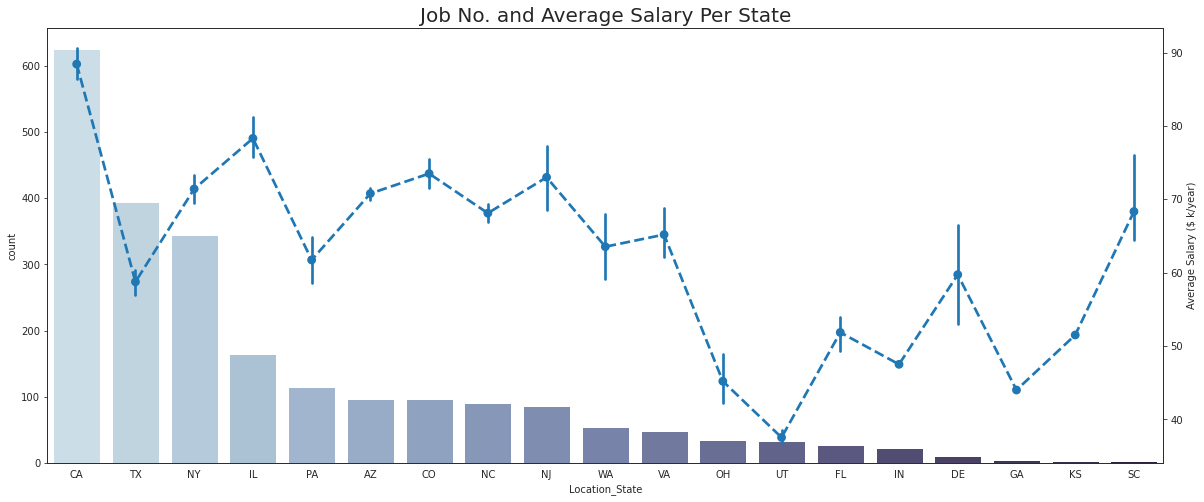

In [33]:
# Show both the job # and average salaries of each state
plt.figure(figsize = (20,8))
state_mean = job.groupby('Location_State')['Salary_Mean'].mean()
sns.countplot(x='Location_State',data=job, order = state_count_list, palette="ch:s=.25,rot=-.25")
ax2 = plt.twinx()
sns.pointplot(x = 'Location_State', y = 'Salary_Mean', data = job,order = state_count_list,ax=ax2, linestyles=["--"])
ax2.set(ylabel = 'Average Salary ($ k/year)')
plt.title("Job No. and Average Salary Per State", size = 20)
plt.show()

From the above, we can see that Califonia has the most job offerings and the highest average salaries; Texas jobs have the lowest average wages among the top 5 job supply states. 

Then we want to contrast the job numbers by the average salary of cities:

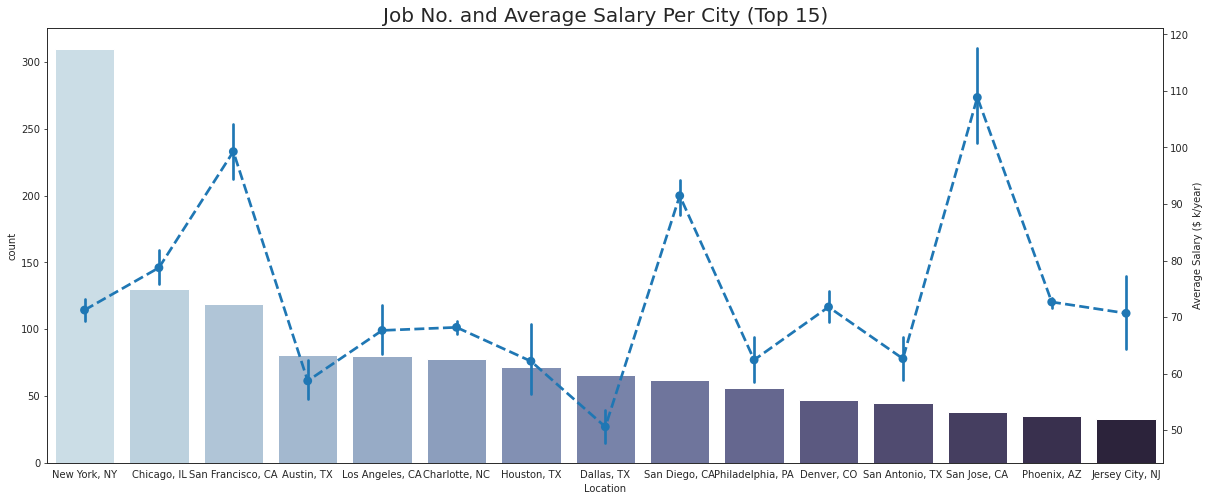

In [34]:
city_15_list = job.groupby('Location')['Location'].count().sort_values(ascending = False).head(15)
city_count_list_15 = [x for x in city_15_list.index]

# Show both the job # and average salaries of each city
plt.figure(figsize = (20,8))
state_mean = job.groupby('Location')['Salary_Mean'].mean()
sns.countplot(x='Location',data=job, order = city_count_list_15, palette="ch:s=.25,rot=-.25")
ax2 = plt.twinx()
sns.pointplot(x = 'Location', y = 'Salary_Mean', data = job, alpha = 0.1, linestyles=["--"],order = city_count_list_15,ax=ax2)
ax2.set(ylabel = 'Average Salary ($ k/year)')
plt.title("Job No. and Average Salary Per City (Top 15)", size = 20)
plt.show()

There are 253 cities with DA jobs, and New York is the city's biggest job market. 
Salary-wise, jobs in the cities of Califonia has significantly higher salaries compared with other cities.

* Top Hirers

Now we are checking the top 50 companies in terms of job listing numbers:

In [35]:
# Create a count Count dataframe to count the job numbers by each company
company_list = sorted(job.groupby('Company Name')['Company Name'].count().items(), key= lambda x:x[1], reverse = True)
top20_company = company_list[0:20]
company_count_list = [x[0] for x in top20_company]

Company_df = job.groupby(['Company Name','Job Title'])['Job Title'].count().to_frame('Count').reset_index()
Company_df = Company_df[Company_df['Company Name'].isin(company_count_list)]
Company_df['Country'] = 'US'
Company_df_sort = Company_df.sort_values('Count', ascending = False)

In [36]:
# Create a count Count dataframe to count the job numbers by each company
#Company_df = job.groupby(['Company Name','Job Title'])['Job Title'].count().to_frame('Count').reset_index()
#Company_df['Country'] = 'US'
#Company_df_sort = Company_df.sort_values('Count', ascending = False)

# Use the Count dataframe to draw the treemap
fig = px.treemap(Company_df_sort, path=['Country', 'Company Name','Job Title'], values='Count',
                 color= 'Count'
                ,color_continuous_scale='Blues', title = 'Top 50 Hirers')
fig.data[0].textinfo = 'label+text+value'
fig.show()

From the above, we can see that among all companies (1502):
there is one company (staffigo Technico Services) offering 58 openings; and nine companies with 20+ positions.
The jobs are sparsely distributed among different companies.

In [37]:
 len(sorted(job.groupby('Company Name')['Company Name'].count().items(), key= lambda x:x[1], reverse = True))

1502

Then let have a look at the salaries of the top 10 hirers:

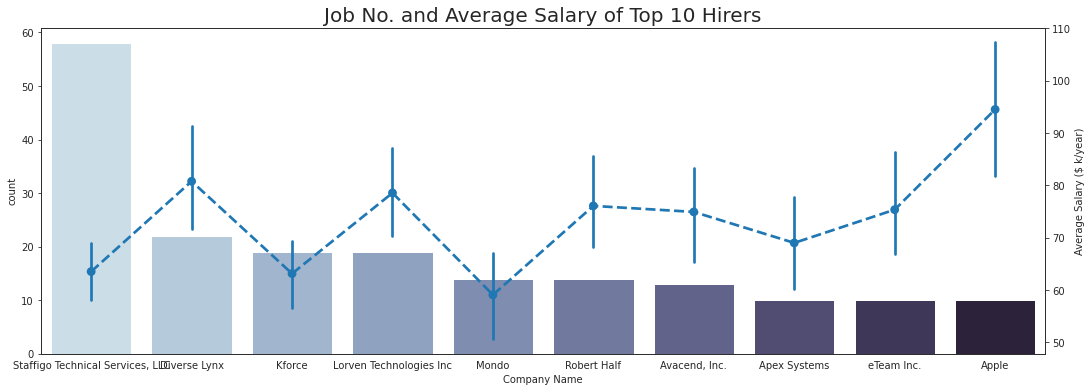

In [38]:
company_s = job.groupby(['Company Name'])['Company Name'].count().sort_values(ascending = False)[:10]
comapny_l = [x for x in company_s.index if x != '-1' ]
plt.figure(figsize = (18,6))
sns.countplot(x='Company Name', data=job, order = comapny_l, palette="ch:s=.25,rot=-.25")
ax2 = plt.twinx()
sns.pointplot(x = 'Company Name', y = 'Salary_Mean', data = job, alpha = 0.1, linestyles=["--"],order = comapny_l,ax=ax2)
ax2.set(ylabel = 'Average Salary ($ k/year)')
plt.title("Job No. and Average Salary of Top 10 Hirers", size = 20)
plt.show()

The Average Salary of top hirer Staffigo Technical Service is lower than other companies, as the openings are mostly for junior DAs. 
Apple Jobs are with higher average salaries.
Here are the links to the website of the top 5 hirers:

* Staffigo: https://www.staffigo.com/it-staffing.html
* Diverse Lynx: https://www.diverselynx.com/
* Kforce:https://www.kforce.com/
* Lorven Technologies Inc: https://www.lorventech.com/
* Mondo: https://mondo.com/

The research finds out that almost all top hirers are IT staffing companies, so it is reasonable to assume that the real demand for DA jobs are from their clients. And since staffing companies stand for a large proportion, no further digging in company-related info, such as size/revenue, etc.

Top 10 Hirers' Company Profile:

In [39]:
company_s = job.groupby(['Company Name'])['Company Name'].count().sort_values(ascending = False)[:10]
comapny_l = [x for x in company_s.index if x != '-1' ]
temp=job[job['Company Name'].isin(comapny_l)]
df_top10_company = temp.groupby('Company Name').first().reset_index()
df_top10_company[['Company Name','Location','Headquarters','Size','Founded','Type of ownership','Revenue','Sector','Industry','Competitors']]

,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Revenue,Sector,Industry,Competitors
0,Apex Systems,"Jersey City, NJ","Glen Allen, VA",1001 to 5000 employees,1995,Subsidiary or Business Segment,$2 to $5 billion (USD),Business Services,Staffing & Outsourcing,"TEKsystems, Insight Global, Accenture"
1,Apple,"Culver City, CA","Cupertino, CA",10000+ employees,1976,Company - Public,$10+ billion (USD),Information Technology,Computer Hardware & Software,"Google, Microsoft, Samsung Electronics"
2,"Avacend, Inc.","Woodcliff Lake, NJ","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Unknown / Non-Applicable,Business Services,Staffing & Outsourcing,-1
3,Diverse Lynx,"New York, NY","Princeton, NJ",501 to 1000 employees,2002,Company - Private,$100 to $500 million (USD),Information Technology,IT Services,-1
4,Kforce,"New York, NY","Tampa, FL",10000+ employees,1966,Company - Public,$1 to $2 billion (USD),Business Services,Staffing & Outsourcing,-1
5,Lorven Technologies Inc,"New York, NY","Plainsboro, NJ",1 to 50 employees,-1,Company - Private,Less than $1 million (USD),Accounting & Legal,Accounting,-1
6,Mondo,"Chicago, IL","New York, NY",51 to 200 employees,2000,Company - Private,$100 to $500 million (USD),Business Services,Staffing & Outsourcing,"Robert Half, Insight Global"
7,Robert Half,"New York, NY","Menlo Park, CA",10000+ employees,1948,Company - Public,$2 to $5 billion (USD),Business Services,Staffing & Outsourcing,"Adecco, Manpower"
8,"Staffigo Technical Services, LLC","New York, NY","Woodridge, IL",51 to 200 employees,2008,Company - Private,$50 to $100 million (USD),Information Technology,IT Services,-1
9,eTeam Inc.,"New York, NY","South Plainfield, NJ",51 to 200 employees,1999,Company - Private,$50 to $100 million (USD),Business Services,Staffing & Outsourcing,"Artech Information Systems, Mindlance, Tech Ma..."


Then we catagorize companies by sectors

In [40]:
# Create a count Count dataframe to count the job numbers by each city
Sector_df = job.groupby(['Sector','Industry'])['Industry'].count().to_frame('Count').reset_index()
Sector_df = Sector_df [Sector_df ['Industry']!= '-1']
Sector_df['Country'] = 'US'

# Use the Count dataframe to draw the treemap
fig = px.treemap(Sector_df, path=['Country', 'Sector', 'Industry'], values='Count',
                 color= 'Count'
                ,color_continuous_scale='Blues', title = 'Job No. by Sector')
fig.data[0].textinfo = 'label+text+value+percent parent'
fig.show()

As we learned from the top hirers, IT services and Staffing & Outsourcing companies stand for a big chunck of the total job market.

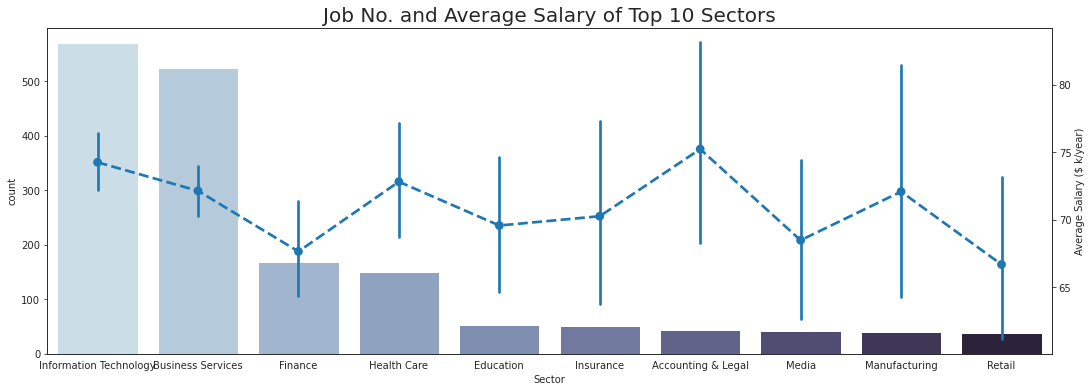

In [41]:
sector_s = job.groupby(['Sector'])['Sector'].count().sort_values(ascending = False)[:11]
sector_l = [x for x in sector_s.index if x != '-1' ]
plt.figure(figsize = (18,6))
sns.countplot(x='Sector', data=job, order = sector_l, palette="ch:s=.25,rot=-.25")
ax2 = plt.twinx()
sns.pointplot(x = 'Sector', y = 'Salary_Mean', data = job, alpha = 0.1, linestyles=["--"],order = sector_l,ax=ax2)
ax2.set(ylabel = 'Average Salary ($ k/year)')
plt.title("Job No. and Average Salary of Top 10 Sectors", size = 20)
plt.show()


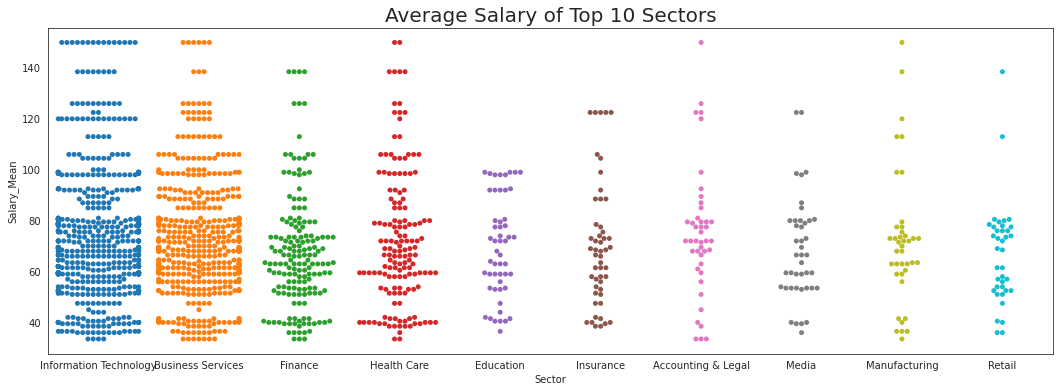

In [42]:
plt.figure(figsize = (18,6))
job_4 = job[job['Sector'].isin(sector_l)]
job_4 = job_4[job_4['Salary_Mean'] != -1 ]
sns.swarmplot(y = job_4['Salary_Mean'], x = job_4['Sector'], order = sector_l)
plt.title("Average Salary of Top 10 Sectors", size = 20)
plt.show()

Noticed from above, companies in IT/ Business Services/Health Care offer higher average salaries.

* Skills

Finally, we are interested to check the general skills needed for DA jobs. We will look into the skills mentioned in:
1. Job Titles;
2. Job Descriptions

In [43]:
# Download stopwords for NLP analysis
nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [44]:
# Set up a set for removal
remove_these = set(stopwords + list(string.punctuation) + list(string.digits))

We will first check job titles:

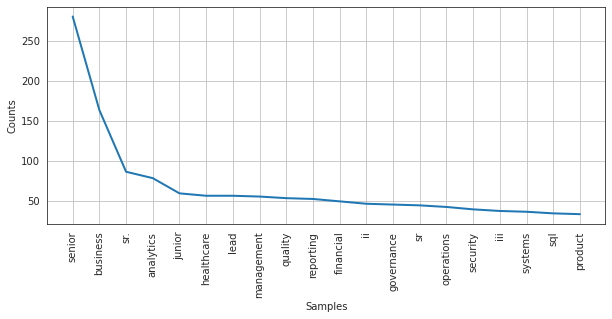

In [45]:
# Check most frequent words in job titles after removing unwanted words
jt_lst = job[job['Job Title'] != '-1']['Job Title'].tolist()
word_list = []
for item in jt_lst:
    content = nltk.word_tokenize(item)
    for word in content:
        if word.lower() not in remove_these and word.lower() != 'data'and word.lower() != 'analyst' and word.lower() != 'data analyst':
            word_list.append(word.lower())
freq = nltk.FreqDist(word_list)
plt.figure(figsize = (10,4))
freq.plot(20)

WordCloud for job titles:


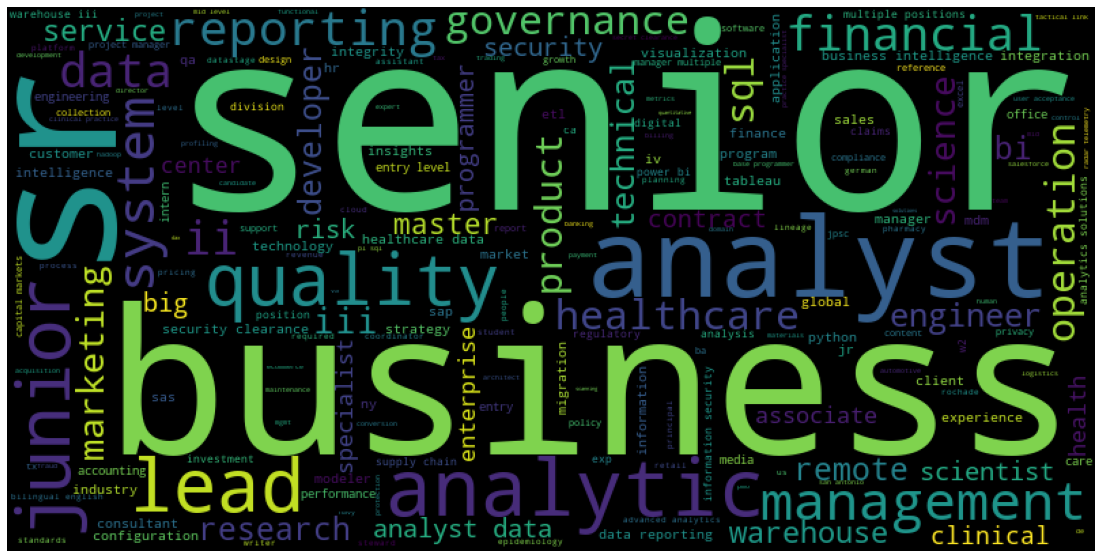

In [46]:
text = ""
for item in word_list:
    if item.lower() not in remove_these and item.lower() != 'data'and item.lower() != 'analyst' and item.lower() != 'data analyst':
        text += " "+str(item.lower())

wordcloud = WordCloud(width = 800, height = 400).generate(text)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We noticed that 'Senior' as the most frequently mentioned word in job titles.
Then we will try to find out the most frequently mentioned skills in job titles:

In [47]:
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

In [48]:
# To extract NERs from all job titles and save in a dictionary
# jt_lst = job[job['Job Title'] != '-1']['Job Title'].tolist()
# word_list = []
job_title_ner = {}
#c=0
for item in jt_lst:
    token = nlp(item)
    for ent in token.ents:      
        job_title_ner.setdefault(ent.label_ , []).append(ent.text) 
#    c = c+1
#    print (c)


In [49]:
job_title_ner.keys()

dict_keys(['PERSON', 'ORG', 'DATE', 'TIME', 'GPE', 'CARDINAL', 'PRODUCT', 'NORP', 'ORDINAL', 'PERCENT', 'LOC', 'LANGUAGE'])

In [50]:
collections.Counter(job_title_ner['ORG']).most_common(10)

[('Business Data', 38),
 ('SQL', 18),
 ('Data Analyst Junior', 17),
 ('Data', 16),
 ('Data Analytics', 10),
 ('Security Clearance', 10),
 ('Sr Data', 10),
 ('SQL Data', 8),
 ('Healthcare', 8),
 ('Healthcare Data Analyst', 7)]

By observations, we noticed that some hard tech skills are mentioned:
* SQL
* SAP
* Python
* SAS
* BI
* ERP
* Microsoft Dynamics
* USMTF
* Excel
* DAX
* LATAM
* Tableau
* AB Testing
* EFL
* Java
* Mongo
* AWS
* VBA
* Oracle
Since we identified them, then we are going to check how often they appear in the job titles.

In [51]:
skill_word_list = ['sql','sap','sas','python','erp','bi','microsoft','dynamics','usmft','excel','dax','latam','tableau','efl','java','mongo','aws','vba','oracle']

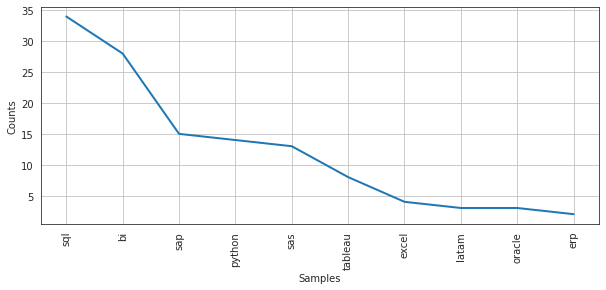

In [52]:
skill_word_count = []
for word in word_list:
    if word in skill_word_list:
        skill_word_count.append(word)

collections.Counter(skill_word_count).most_common(10)
freq_skills = nltk.FreqDist(skill_word_count)
plt.figure(figsize = (10,4))
freq_skills.plot(10)

We can see from above that SQL, BI, SAP, Python seem to be the most commonly mentioned skills in job titles

> Then we move on to job descriptions:

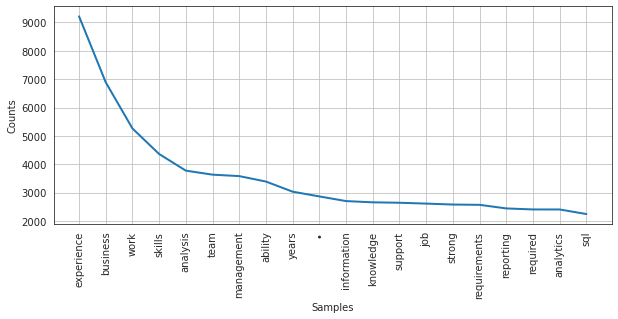

In [53]:
# Check most frequent words in job titles after removing unwanted words
jd_lst = job[job['Job Description'] != '-1']['Job Description'].tolist()
word_list_jd = []
for item in jd_lst:
    content = nltk.word_tokenize(item)
    for word in content:
        if word.lower() not in remove_these and word.lower() != 'data'and word.lower() != 'analyst' and word.lower() != 'data analyst':
            word_list_jd.append(word.lower())
freq = nltk.FreqDist(word_list_jd)
plt.figure(figsize = (10,4))
freq.plot(20)

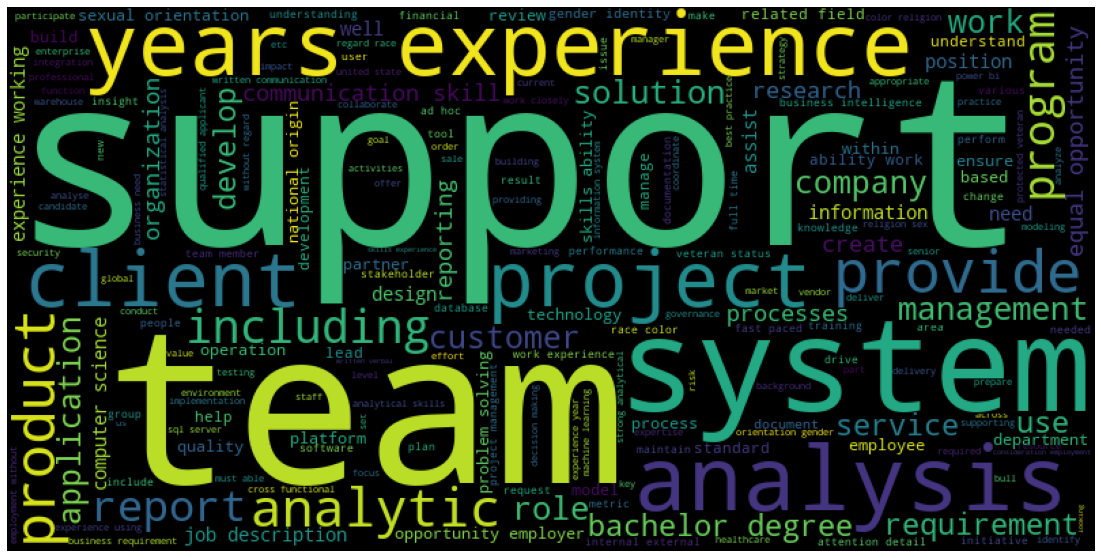

In [54]:
text_jd = ""
for item in word_list_jd:
    text_jd += " "+str(item.lower())

wordcloud = WordCloud(width = 800, height = 400).generate(text_jd)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

'Support', 'team','experience' seem to be highly frequently mentioned words in JDs. 

In [55]:
#jd_lst = job[job['Job Description'] != '-1']['Job Description'].tolist()
#word_list_jd = []
job_description_ner = {}
#c=0
for item in jd_lst:
    token = nlp(item)
    for ent in token.ents:      
        job_description_ner.setdefault(ent.label_ , []).append(ent.text) 
#    c = c+1
#    print (c)


In [56]:
job_description_ner.keys()

dict_keys(['DATE', 'ORG', 'CARDINAL', 'PRODUCT', 'PERSON', 'NORP', 'GPE', 'WORK_OF_ART', 'FAC', 'MONEY', 'LOC', 'LANGUAGE', 'PERCENT', 'EVENT', 'ORDINAL', 'LAW', 'TIME', 'QUANTITY'])

Then we want to check the most_common skills mentioned under the tag 'ORG':

In [57]:
collections.Counter(job_description_ner['ORG']).most_common(10)

[('SQL', 2104),
 ('Bachelor', 628),
 ('Tableau', 525),
 ('SAS', 411),
 ('Microsoft', 309),
 ('BI', 254),
 ('Python', 248),
 ('Data', 241),
 ('Analyze', 206),
 ('ETL', 205)]

By observation, we noticed some additional tech skills to the skill_word_list:

In [58]:
skill_word_list = ['sql','sap','sas','python','erp','bi','microsoft','dynamics','usmft','excel','dax','latam','tableau','efl','java','mongo','aws','vba','oracle','spss','javascript','visio','access','git','github','python/r'       ]

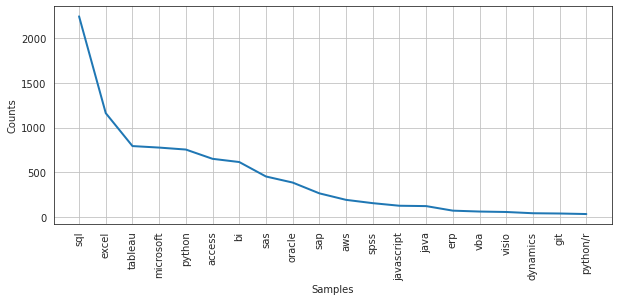

In [59]:
skill_word_count_jd = []
for word in word_list_jd:
    if word in skill_word_list:
        skill_word_count_jd.append(word)

collections.Counter(skill_word_count_jd).most_common(10)
freq_skills = nltk.FreqDist(skill_word_count_jd)
plt.figure(figsize = (10,4))
freq_skills.plot(20)

From above analysis we can see that SQL/Excel/Tableau/Python/BI are all very popular skills mentioned in JDs.

We continue to check other observations (education / experience requirments):

In [60]:
# Education:
print('Times of GED mentioned: ' + str(collections.Counter(word_list_jd)['ged']))
print('Times of Bachelor mentioned: ' + str(collections.Counter(word_list_jd)['bachelor']+collections.Counter(word_list_jd)['undergraduate']))
print('Times of Master mentioned: ' + str(collections.Counter(word_list_jd)['master']+collections.Counter(word_list_jd)['postgraduate']))
print('Times of Doctor mentioned: ' + str(collections.Counter(word_list_jd)['dr.']+collections.Counter(word_list_jd)['dr']))

Times of GED mentioned: 34
Times of Bachelor mentioned: 1001
Times of Master mentioned: 696
Times of Doctor mentioned: 33


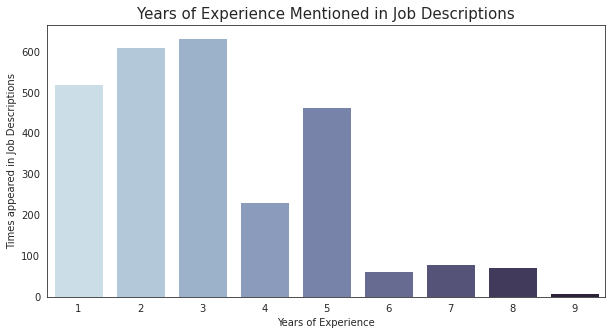

In [61]:
# Experience:
collections.Counter(job_description_ner['DATE']).most_common()
new_lst = []
for word in job_description_ner['DATE']:
    if 'year' in word:
        new_lst.append(word)

# to re-classify the experience years catagory
years = collections.Counter(new_lst).most_common()
new_year_dict = {'1':0, '2':0, '3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0}
for tup in years:
    if '1'in tup[0]:
        new_year_dict['1'] += tup[1]
    elif '2'in tup[0]:
        new_year_dict['2'] += tup[1]
    elif '3'in tup[0]:
        new_year_dict['3'] += tup[1]
    elif '4'in tup[0]:
        new_year_dict['4'] += tup[1]        
    elif '5'in tup[0]:
        new_year_dict['5'] += tup[1]
    elif '6'in tup[0]:
        new_year_dict['6'] += tup[1]
    elif '7'in tup[0]:
        new_year_dict['7'] += tup[1]
    elif '8'in tup[0]:
        new_year_dict['8'] += tup[1]
    elif '9'in tup[0]:
        new_year_dict['9'] += tup[1]


years_s = pd.Series(new_year_dict)

plt.figure(figsize = (10,5))
sns.barplot(x= years_s.index, y = years_s.values,  palette="ch:s=.25,rot=-.25")
plt.xlabel('Years of Experience')
plt.ylabel('Times appeared in Job Descriptions')
plt.title("Years of Experience Mentioned in Job Descriptions", size = 15)
plt.show()


1-5 years'experience are mostly common-mentioned requirement in job descriptions.

# Summary

We gained a general picture of the US job market for data analysts through the dataset analysis. 

Firstly, **Salary-wise**, the average salary of most jobs is within 55-80k, the average is 72k; companies typically gave out a salary range within 25-45k, the average is 35k. 

**Geographically**, all jobs are located in 19 states, Califonia, Texas, New York provides more than 50% of total employment; New York City & Chicago are the most significant job markets at the city level. 

Almost all **top hirers** (like:Staffigo/Diverse Lynx/Kforce etc., except Apple) are IT staffing companies. So it is reasonable to assume that the real demand for DA jobs is from their clients; on the other hand, job seekers may consider getting in touch with these agents to get in the talent pool. 

Finally, job titles and descriptions show that some **hard tech skills** are popular, such as SQL/Tableau/Power BI/Excel, so that job seeker could consider horning the skills beforehand. Besides, a bachelor's degree and 1-5 years' experience are generally preferred as well.

